In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr

In [6]:
kk = pd.read_csv("Advertising.csv")

In [7]:
kk = kk.iloc[:,1:]

In [8]:
kk.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
kk.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [10]:
kk.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
kk.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [12]:
kk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
kk.shape

(200, 4)

In [14]:
kk.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [15]:
top_20 = kk.nlargest(20,'Sales')
top_20

,TV,Radio,Newspaper,Sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
36,266.9,43.8,5.0,25.4
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
128,220.3,49.0,3.2,24.7
17,281.4,39.6,55.8,24.4
61,261.3,42.7,54.7,24.2
58,210.8,49.6,37.7,23.8


<Axes: title={'center': 'Top 20 records'}, xlabel='Hours Studied', ylabel='Sales'>

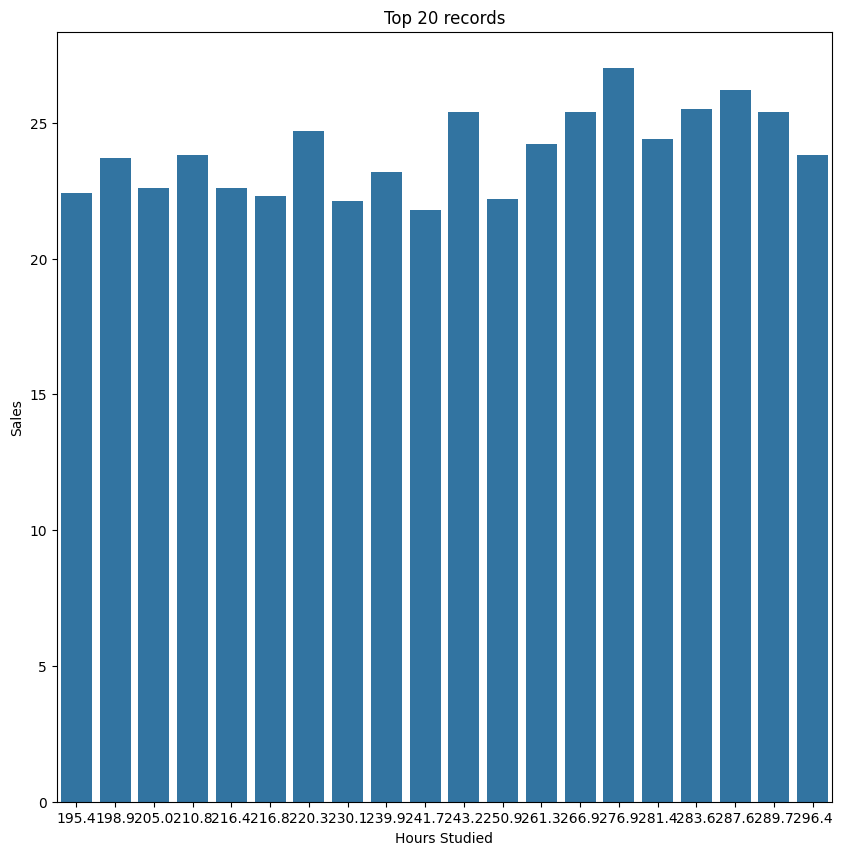

In [16]:
plt.figure(figsize=(10,10))
plt.title("Top 20 records")
plt.xlabel("Hours Studied")
plt.ylabel("Sales")
sns.barplot(x=top_20['TV'],y=top_20['Sales'])

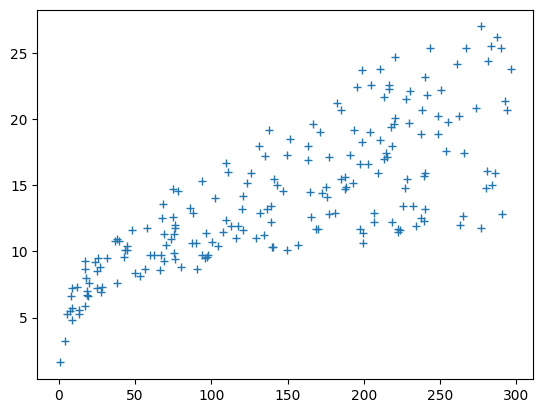

In [17]:
x = kk['TV']
y = kk['Sales']
plt.plot(x,y,'+')

<Axes: xlabel='TV', ylabel='Sales'>

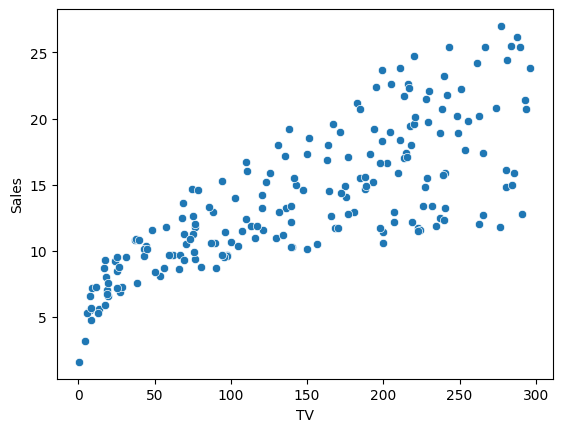

In [18]:
sns.scatterplot(x=x,y=y,data=kk)

In [19]:
xtrain,xtest,ytrain,ytest = tts(x.to_frame(),y,test_size=0.2,random_state=12)

In [20]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((160, 1), (40, 1), (160,), (40,))

In [21]:
xtrain,xtest,ytrain,ytest

(        TV
 77   120.5
 47   239.9
 94   107.4
 14   204.1
 41   177.0
 ..     ...
 3    151.5
 130    0.7
 134   36.9
 155    4.1
 75    16.9
 
 [160 rows x 1 columns],
         TV
 23   228.3
 182   56.2
 172   19.6
 21   237.4
 63   102.7
 11   214.7
 61   261.3
 32    97.2
 164  117.2
 7    120.2
 95   163.3
 173  168.4
 132    8.4
 120  141.3
 98   289.7
 138   43.0
 31   112.9
 16    67.8
 181  218.5
 85   193.2
 185  205.0
 166   17.9
 101  296.4
 129   59.6
 113  209.6
 51   100.4
 167  206.8
 88    88.3
 108   13.1
 136   25.6
 29    70.6
 183  287.6
 152  197.6
 93   250.9
 189   18.7
 139  184.9
 179  165.6
 55   198.9
 1     44.5
 5      8.7,
 77     14.2
 47     23.2
 94     11.5
 14     19.0
 41     17.1
        ... 
 3      18.5
 130     1.6
 134    10.8
 155     3.2
 75      8.7
 Name: Sales, Length: 160, dtype: float64,
 23     15.5
 182     8.7
 172     7.6
 21     12.5
 63     14.0
 11     17.4
 61     24.2
 32      9.6
 164    11.9
 7      13.2
 95     16.9
 173   

In [22]:
model = lr()

In [23]:
model.fit(xtrain,ytrain)

LinearRegression()

In [24]:
model.coef_,model.intercept_

(array([0.04548552]), 7.243470634952243)

In [34]:
prediction = model.predict(xtest)

Text(0, 0.5, 'Performance Index')

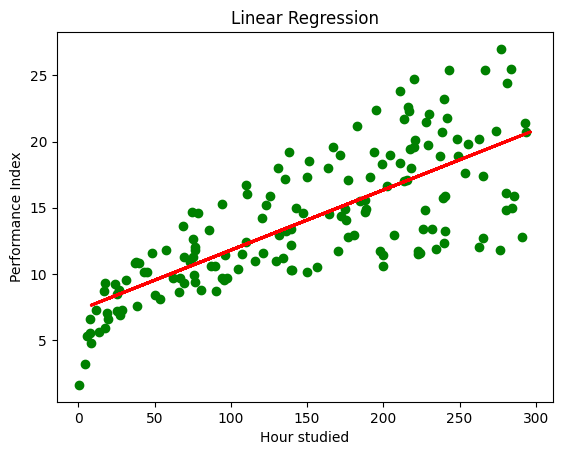

In [35]:
plt.scatter(xtrain,ytrain,color = 'green')
plt.plot(xtest,prediction,color = 'red',linewidth = 2)
plt.title("Linear Regression")
plt.xlabel("Hour studied")
plt.ylabel("Performance Index")

<Axes: xlabel='TV', ylabel='Sales'>

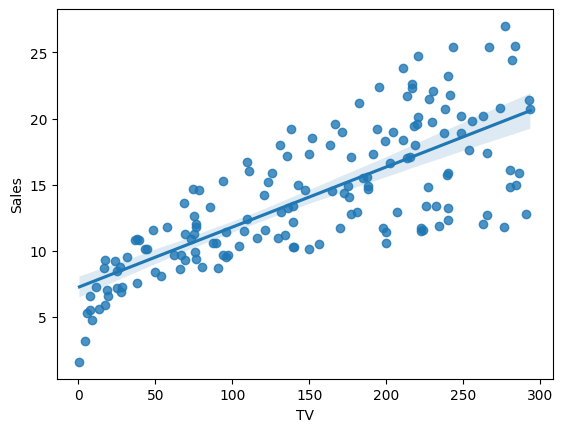

In [36]:
sns.regplot(data=kk,x=xtrain,y=ytrain)

In [41]:
from sklearn.metrics import mean_absolute_error as mae,r2_score as r2 ,mean_squared_error as mse


In [42]:
mae(ytest,prediction)

2.291728300762607

In [38]:
mse(ytest,prediction)

9.084484553750142

In [40]:
r2(ytest,prediction)

0.7176344112762998